In [2]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud

In [3]:
data = load_google_sheet()

🕥-FUCTION: load_google_sheet()
✅-Completed: Time taken: 4.26 seconds


,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything
...,...,...,...,...
502,2023-12-09 01:19:47,Extremely likely,i recently had the pleasure of visiting the gp...,dedicated mental health professionals having m...
503,2023-12-09 14:04:56,Extremely likely,very happy with my general practitioner thank you,would like to see normal blood results sent vi...
504,2023-12-09 14:06:11,Extremely likely,my experience at the gp practice is always ok,reception area not in the best manner could be...
505,2023-12-09 14:47:02,Extremely likely,i do not like going to the doctor by all my ex...,would like to see information about the ppg p...


In [18]:
processed_data = pd.read_csv(f"{DATA_PATH}/data.csv")
processed_data

,time,rating,free_text,do_better,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up,5.0,admiration,0.588930,positive,0.866406,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,5.0,admiration,0.910946,positive,0.925523,NaN
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best,5.0,admiration,0.875547,positive,0.968350,Overall Patient Satisfaction
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind,5.0,admiration,0.905494,positive,0.975969,Reception Services
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,5.0,neutral,0.234010,neutral,0.757862,Overall Patient Satisfaction
...,...,...,...,...,...,...,...,...,...,...
536,2023-12-11 14:27:42,Don't know,NaN,NaN,NaN,neutral,0.954960,positive,0.401299,NaN
537,2023-12-11 14:27:47,Don't know,NaN,NaN,NaN,neutral,0.954960,positive,0.401299,NaN
538,2023-12-11 14:27:52,Don't know,NaN,NaN,NaN,neutral,0.954960,positive,0.401299,NaN
539,2023-12-11 14:27:58,Don't know,NaN,NaN,NaN,neutral,0.954960,positive,0.401299,NaN


<Axes: xlabel='sentiment_score', ylabel='Count'>

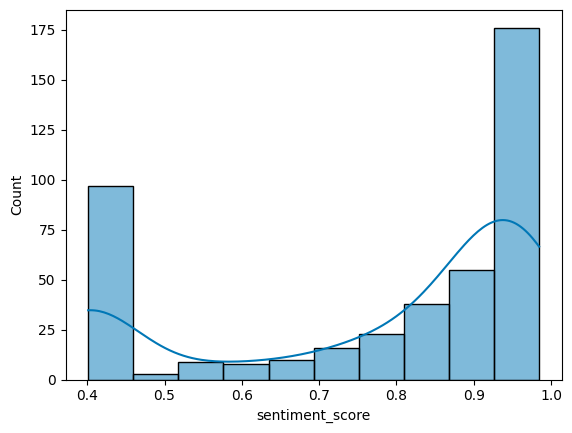

In [29]:
pos_sentiment = processed_data[processed_data['sentiment'] == "positive"]
sns.histplot(data=pos_sentiment, x='sentiment_score', color='#0077b6', kde=True)

<Axes: xlabel='sentiment_score', ylabel='Count'>

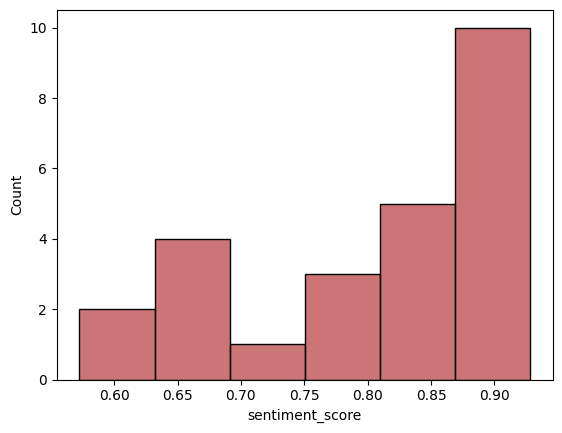

In [27]:
neg_sentiment = processed_data[processed_data['sentiment'] == "negative"]
sns.histplot(data=neg_sentiment, x='sentiment_score', color='#bc4749')

In [64]:
selected_feedback = processed_data[(processed_data['sentiment'] == "negative") & \
                                   (processed_data['sentiment_score'] >= 0.65)].sort_values(by='sentiment_score', ascending=False)






Doctor Consultations
No Improvement Suggestion
Overall Patient Satisfaction
Patient Participation Group
Phlebotomy Service & Blood Test Results
Poor Communication
Quality of Medical Advice
Reception Services
Referral Process
Telephone Service
Vaccinations


In [20]:
%config InlineBackend.figure_format = 'retina'


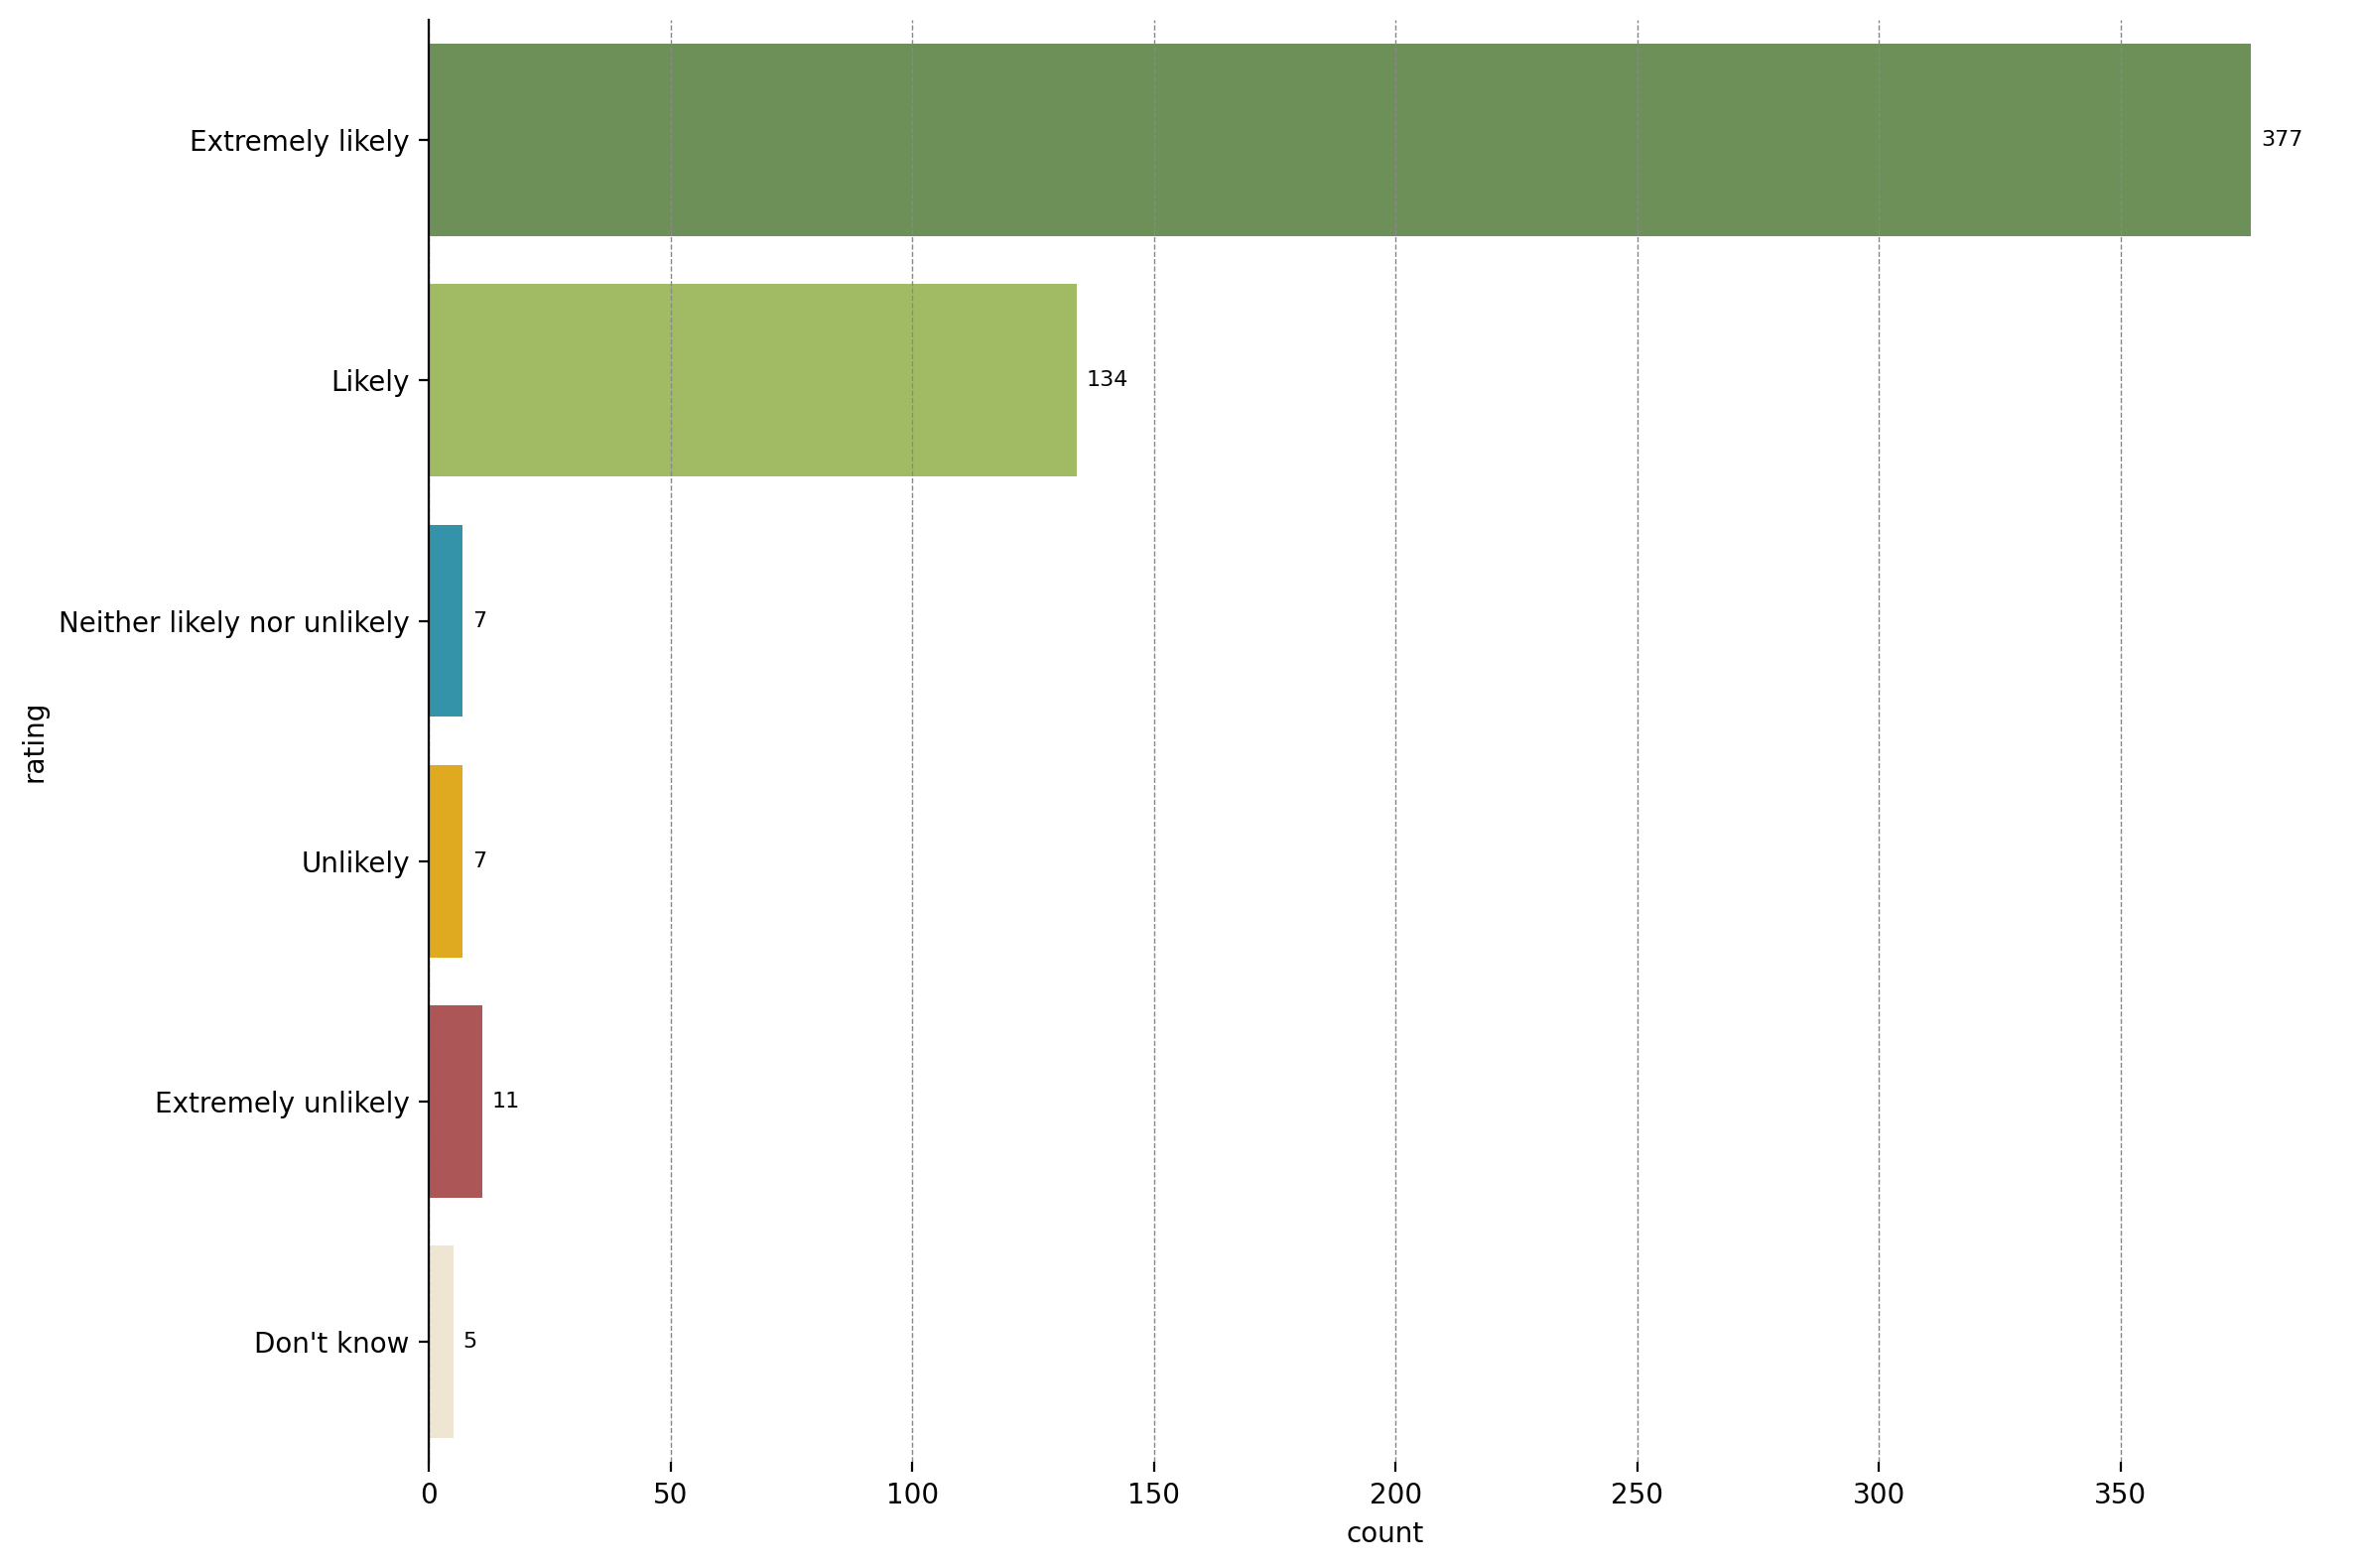

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 8))  # For example, 12 inches wide and 8 inches tall

# Define the order and corresponding colors
order = [
    'Extremely likely', 
    'Likely', 
    'Neither likely nor unlikely', 
    'Unlikely', 
    'Extremely unlikely', 
    'Don\'t know'
]

# Define a color for each category
palette = {
    'Extremely likely': '#6a994e',
    'Likely': '#A7C957',
    'Neither likely nor unlikely': '#219ebc',
    'Unlikely': '#ffb700',
    'Extremely unlikely': '#bc4749',
    'Don\'t know': '#F2E8CF'
}

# Create the countplot with specified order and palette
sns.countplot(data=processed_data, y='rating', order=order, palette=palette)

# Access the current Axes instance
ax = plt.gca()

# Iterate through the rectangles (bars) of the plot
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(width + 2, y, f'{int(width)}', va='center', fontsize=8)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(False)

plt.tight_layout()
plt.show()




In [10]:
processed_data['rating'].value_counts()

Extremely likely               375
Likely                         133
Extremely unlikely              11
Unlikely                         7
Neither likely nor unlikely      6
Don't know                       1
Name: rating, dtype: int64

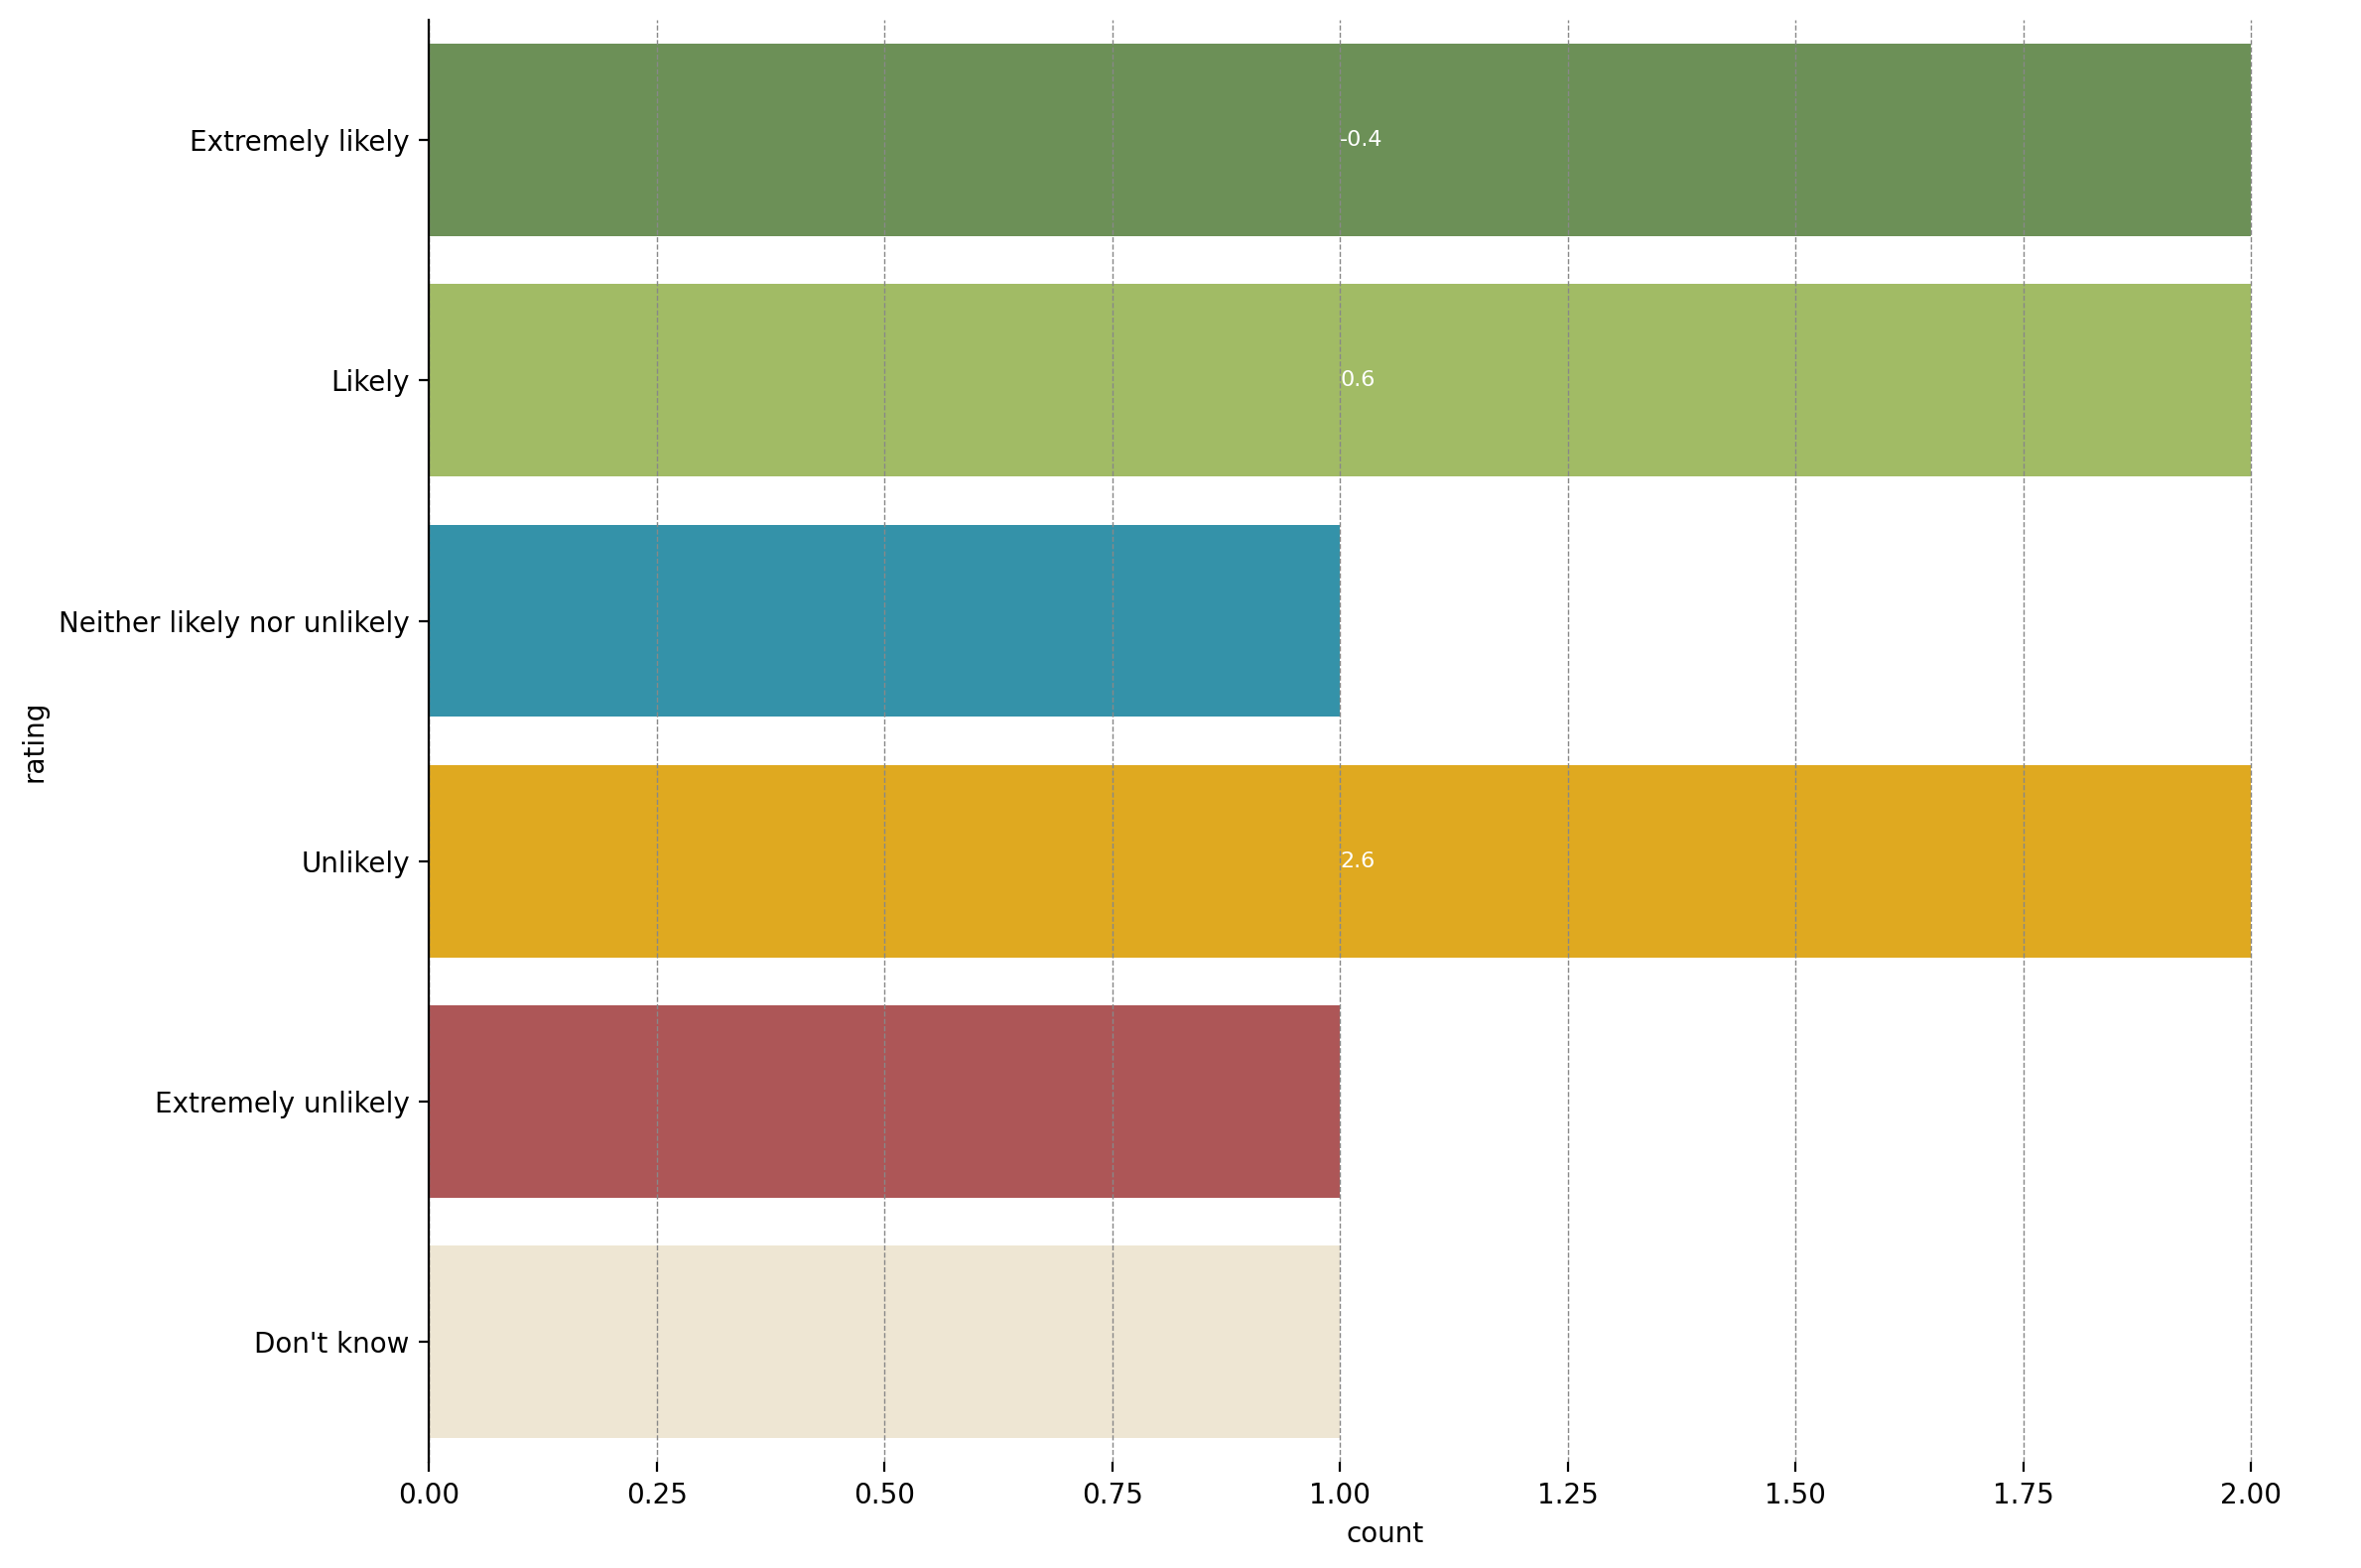

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data - replace this with your actual data
processed_data = pd.DataFrame({
    'rating': ['Extremely likely', 'Likely', 'Neither likely nor unlikely', 
               'Unlikely', 'Extremely unlikely', 'Don\'t know', 
               'Likely', 'Extremely likely', 'Unlikely']  # Add your data here
})

# Define the order and corresponding colors
order = [
    'Extremely likely', 
    'Likely', 
    'Neither likely nor unlikely', 
    'Unlikely', 
    'Extremely unlikely', 
    'Don\'t know'
]

palette = {
    'Extremely likely': '#6a994e',
    'Likely': '#A7C957',
    'Neither likely nor unlikely': '#219ebc',
    'Unlikely': '#ffb700',
    'Extremely unlikely': '#bc4749',
    'Don\'t know': '#F2E8CF'
}

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 8))

sns.countplot(data=processed_data, y='rating', order=order, palette=palette)
ax = plt.gca()

for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    # Place the y-label on the bar
    ax.text(1, y, p.get_y(), va='center', fontsize=8, color='white')  # Adjust position and color as needed

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(False)
plt.tight_layout()

plt.show()
